In [4]:
# 1. Importowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("train.csv")

In [6]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# Sprawdzenie ile jest brakujących wartości w każdej kolumnie
print(df.isnull().sum())

# Uzupełniamy brakujące wartości w kolumnie 'Age' medianą wieku i przypisujemy z powrotem do kolumny
df['Age'] = df['Age'].fillna(df['Age'].median())

# Uzupełniamy brakujące wartości w kolumnie 'Embarked' najczęściej występującą wartością (modą) i przypisujemy z powrotem
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# W kolumnie 'Cabin' brakujące wartości zastępujemy tekstem 'Unknown' i przypisujemy z powrotem
df['Cabin'] = df['Cabin'].fillna('Unknown')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print (df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  Unknown        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  Unknown        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  Unk

In [11]:

  df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df['IsAlone'] = (df['FamilySize']==1)

In [14]:
df['IsChild'] = df['Age'] < 10

In [24]:
df['IsTeenager'] = (df['Age'] >= 10) & (df['Age'] <= 19)

In [16]:
print(df.groupby('Pclass')['Survived'].mean())
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Title')['Survived'].mean())


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64


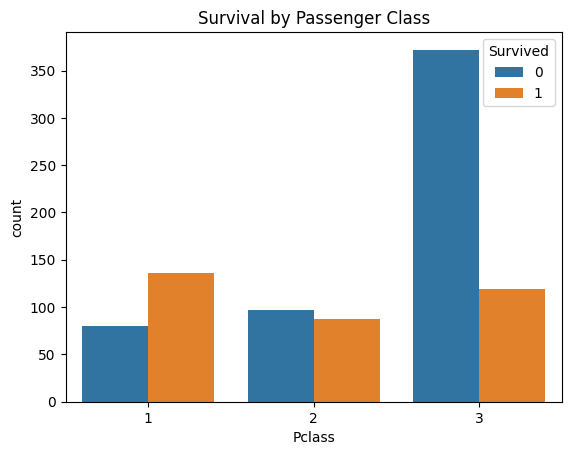

In [17]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

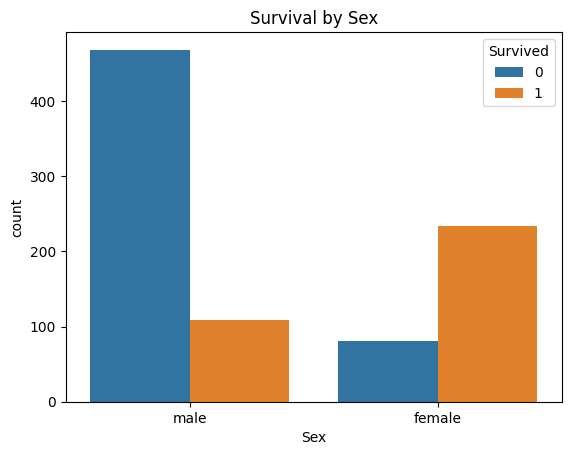

In [18]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

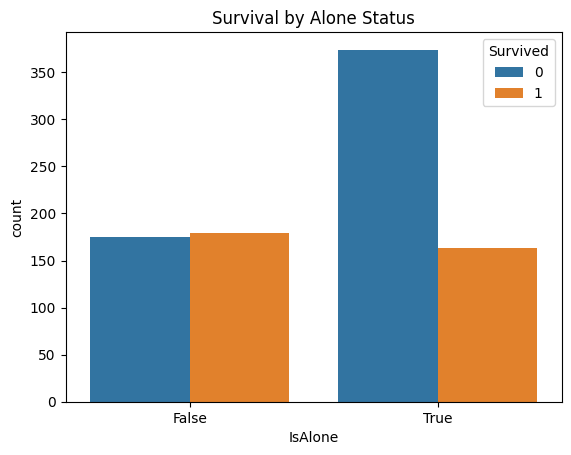

In [19]:
sns.countplot(data=df, x='IsAlone', hue='Survived')
plt.title('Survival by Alone Status')
plt.show()

In [20]:
df.to_csv("cleaned_train.csv")

Text(0.5, 1.0, 'Survival by Teenagers')

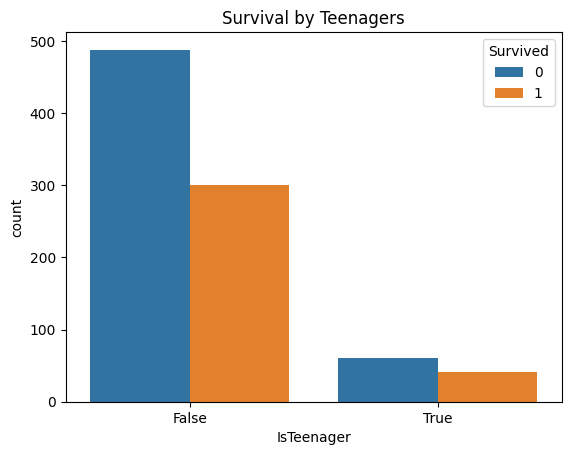

In [25]:
sns.countplot(data= df, x='IsTeenager', hue='Survived')
plt.title('Survival by Teenagers')

In [27]:
df.to_csv("cleaned_train.csv")

In [ ]:
pip freeze > requirements.txt